In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("01_bbdd_think_tanks_no_stopwords.parquet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17432 entries, 205 to 31640
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    17432 non-null  int64         
 1   Think Tank            17432 non-null  object        
 2   Tipo de Think Tank    17432 non-null  object        
 3   Orientación Política  17432 non-null  object        
 4   Autor                 8390 non-null   object        
 5   Título                17425 non-null  object        
 6   Medio                 2498 non-null   object        
 7   Corpus                16690 non-null  object        
 8   Producto              10353 non-null  object        
 9   Enlace                17432 non-null  object        
 10  CorpusPDF             237 non-null    object        
 11  FechaPublicacion      17432 non-null  datetime64[ns]
 12  Año                   17432 non-null  float64       
 13  Mes                

C:\Users\rodri\AppData\Local\Temp\ipykernel_11604\2256185204.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


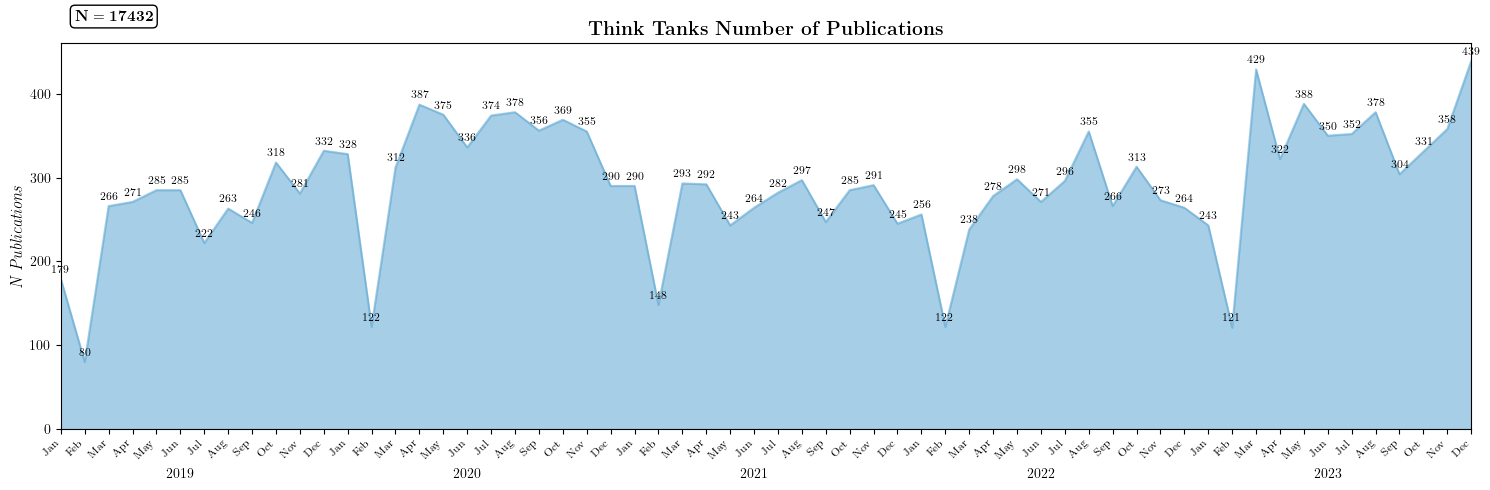

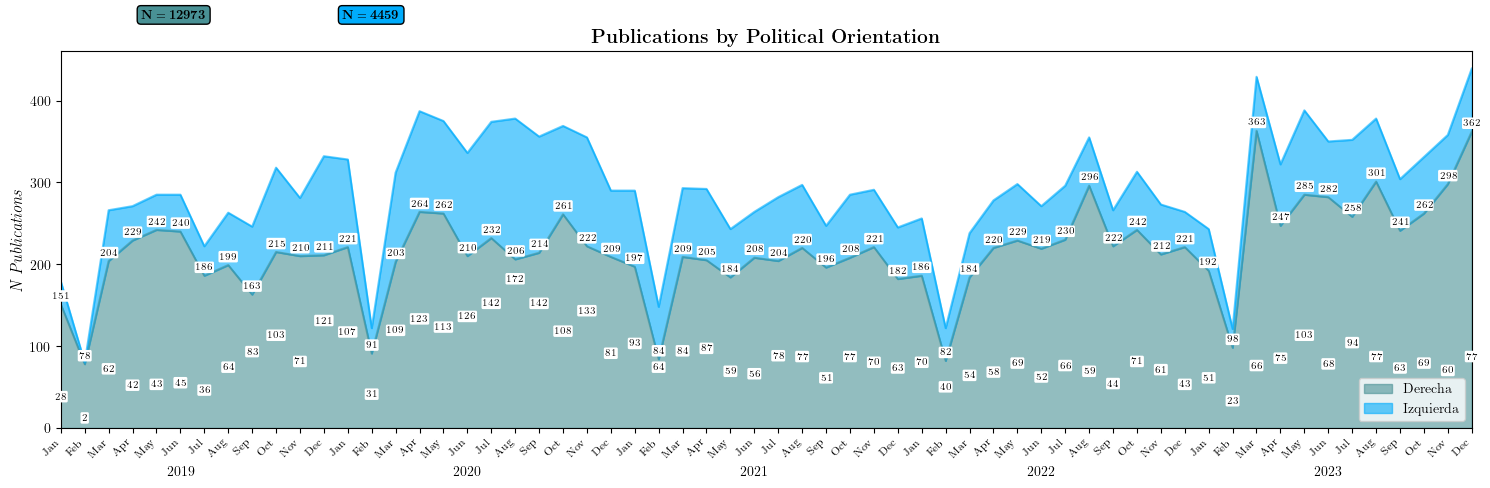

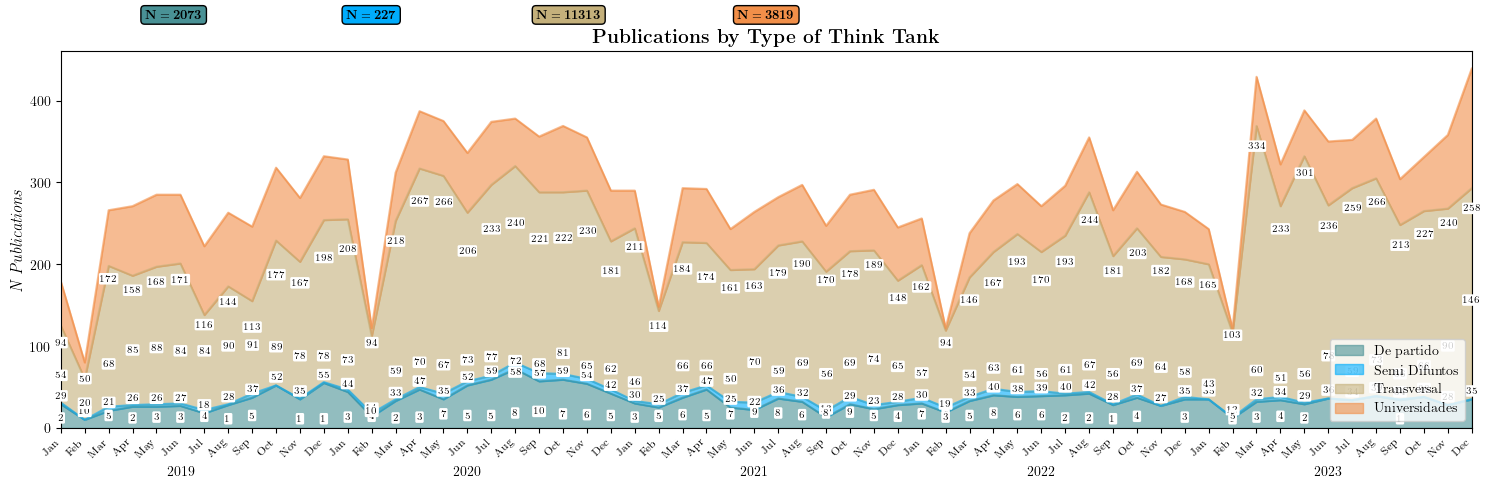

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN GENERAL DE ESTILO ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 10
})

# --- EJES TEMPORALES ---
fechas = pd.date_range(start='2019-01-01', end='2023-12-01', freq='MS')
meses = [f.strftime('%b') for f in fechas]
años_pos = [f.replace(month=6) for f in pd.date_range('2019-01-01', '2023-01-01', freq='YS')]
años_lbl = [str(f.year) for f in años_pos]

# --- AGRUPAMIENTO ---
grouped_general = df.groupby(pd.Grouper(key='FechaPublicacion', freq='MS')).size()
grouped_orientacion = df.groupby([pd.Grouper(key='FechaPublicacion', freq='MS'), 'Orientación Política']).size().unstack(fill_value=0)
grouped_tipo = df.groupby([pd.Grouper(key='FechaPublicacion', freq='MS'), 'Tipo de Think Tank']).size().unstack(fill_value=0)

# --- PALETAS DE COLOR ---
colores_politica = {
    'Derecha': '#499195',       # Foto 1
    'Izquierda': '#00ACFC'      # Foto 2
}

colores_tipo = {
    'Transversal': '#C4B07B',     # Foto 3
    'Universidades': '#F18F49',   # Foto 4
    'De partido': '#499195',      # Foto 5
    'Semi Difuntos': '#00ACFC'    # Foto 6
}


# --- FUNCIÓN DE VISUALIZACIÓN ---
def graficar_area(data, title, ylabel, colors_dict=None, show_legend=True):
    fig, ax = plt.subplots(figsize=(15, 5))

    # === ÁREA ===
    if isinstance(data, pd.Series):
        data.plot.area(ax=ax, alpha=0.6, color='#6baed6')
        total_n = data.sum()
        for x, y in data.items():
            if y > 0:
                ax.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=8)
    else:
        data.plot.area(ax=ax, alpha=0.6, color=[colors_dict[col] for col in data.columns])
        total_n = data.sum().sum()
        for col in data.columns:
            for x, y in data[col].items():
                if y > 0:
                    ax.text(x, y + 5, str(y), ha='center', va='bottom',
                            fontsize=7, bbox=dict(boxstyle='round,pad=0.15',
                                                  facecolor='white', edgecolor='none'))

    # === EJE X ===
    ax.set_xticks(fechas)
    ax.set_xticklabels(meses, rotation=45, ha='right', fontsize=8)
    for pos, year in zip(años_pos, años_lbl):
        ax.text(pos, -0.1, year, ha='center', va='top', fontsize=10,
                transform=ax.get_xaxis_transform())

    # === BLOQUES N ===
    if isinstance(data, pd.Series):
        ax.text(0.01, 1.05, f"$\\mathbf{{N = {total_n}}}$", transform=ax.transAxes,
                fontsize=11, va='bottom', ha='left',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))
    else:
        posiciones = [0.08, 0.22, 0.36, 0.50]  # posición horizontal en el gráfico
        for i, col in enumerate(data.columns):
            ax.text(posiciones[i], 1.08, f"$\\mathbf{{N = {data[col].sum()}}}$",
                    transform=ax.transAxes, fontsize=9, va='bottom', ha='center',
                    bbox=dict(boxstyle='round,pad=0.3',
                              facecolor=colors_dict[col],
                              edgecolor='black'))

    # === LEYENDA Y ETIQUETAS ===
    if show_legend and isinstance(data, pd.DataFrame):
        ax.legend(title='', loc='lower right')
    else:
        ax.legend().set_visible(False)

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(r'\textit{}')
    plt.tight_layout()
    plt.show()


# === GRAFICO 1: GENERAL ===
graficar_area(
    data=grouped_general,
    title=r'\textbf{Think Tanks Number of Publications}',
    ylabel=r'\textit{N Publications}',
    colors_dict=None,
    show_legend=False
)

# === GRAFICO 2: POR ORIENTACIÓN POLÍTICA ===
graficar_area(
    data=grouped_orientacion,
    title=r'\textbf{Publications by Political Orientation}',
    ylabel=r'\textit{N Publications}',
    colors_dict=colores_politica,
    show_legend=True
)

# === GRAFICO 3: POR TIPO DE THINK TANK ===
graficar_area(
    data=grouped_tipo,
    title=r'\textbf{Publications by Type of Think Tank}',
    ylabel=r'\textit{N Publications}',
    colors_dict=colores_tipo,
    show_legend=True
)
